# Learning Tree Structure from Data using the Chow-Liu Algorithm 

## First, create a tree graph

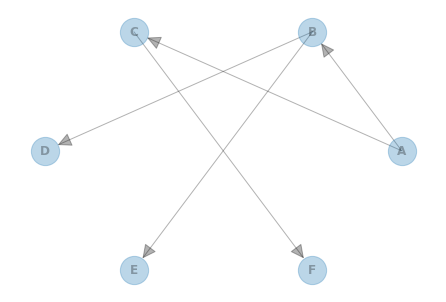

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

from pgmpy.models.BayesianModel import BayesianModel

# construct the tree graph structure
model = BayesianModel([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F')])
nx.draw_circular(model, with_labels=True, arrowsize=30, node_size=800, alpha=0.3, font_weight='bold')
plt.show()


## Then, add CPDs to our tree to create a Bayesian network

In [2]:
from pgmpy.factors.discrete import TabularCPD

# add CPD to each edge
cpd_a = TabularCPD('A', 2, [[0.4], [0.6]])
cpd_b = TabularCPD('B', 3, [[0.6,0.2],[0.3,0.5],[0.1,0.3]], evidence=['A'], evidence_card=[2])
cpd_c = TabularCPD('C', 2, [[0.3,0.4],[0.7,0.6]], evidence=['A'], evidence_card=[2])
cpd_d = TabularCPD('D', 3, [[0.5,0.3,0.1],[0.4,0.4,0.8],[0.1,0.3,0.1]], evidence=['B'], evidence_card=[3])
cpd_e = TabularCPD('E', 2, [[0.3,0.5,0.2],[0.7,0.5,0.8]], evidence=['B'], evidence_card=[3])
cpd_f = TabularCPD('F', 3, [[0.3,0.6],[0.5,0.2],[0.2,0.2]], evidence=['C'], evidence_card=[2])
model.add_cpds(cpd_a, cpd_b, cpd_c, cpd_d, cpd_e, cpd_f)


## Next, generate sample data from our tree Bayesian network

In [3]:
from pgmpy.sampling import BayesianModelSampling

# sample data from BN
inference = BayesianModelSampling(model)
df_data = inference.forward_sample(size=10000, return_type='dataframe')
print(df_data)


Generating for node: D: 100%|██████████| 6/6 [00:01<00:00,  3.25it/s]

      A  C  F  B  E  D
0     0  0  1  1  1  1
1     1  1  0  2  1  1
2     1  1  0  2  1  1
3     1  1  2  1  1  1
4     0  1  1  0  1  1
...  .. .. .. .. .. ..
9995  0  0  2  0  1  1
9996  1  1  0  2  1  1
9997  1  0  0  1  1  1
9998  1  0  1  1  1  2
9999  1  1  0  1  0  1

[10000 rows x 6 columns]


## Finally, apply the Chow-Liu algorithm to learn the tree graph from sample data

Building tree: 100%|██████████| 15/15.0 [00:00<00:00, 558.67it/s]


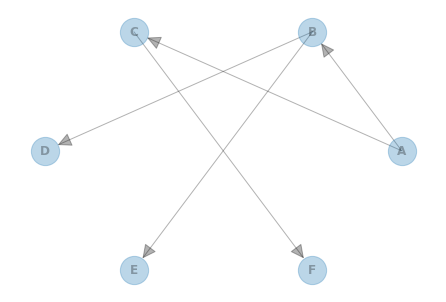

In [4]:
from pgmpy.estimators import TreeSearch

# learn graph structure 
est = TreeSearch(df_data, root_node="A")
dag = est.estimate(estimator_type="chow-liu")
nx.draw_circular(dag, with_labels=True, arrowsize=30, node_size=800, alpha=0.3, font_weight='bold')
plt.show()


## To parameterize the learned graph from data, check out the other tutorials for more info

In [5]:
from pgmpy.estimators import BayesianEstimator

# there are many choices of parametrization, here is one example
model = BayesianModel(dag.edges())
model.fit(df_data, estimator=BayesianEstimator, prior_type='dirichlet', pseudo_counts=0.1)
model.get_cpds()

[<TabularCPD representing P(A:2) at 0x7fe1b28a58b0>,
 <TabularCPD representing P(B:3 | A:2) at 0x7fe1b28a5a90>,
 <TabularCPD representing P(C:2 | A:2) at 0x7fe1b28a5f70>,
 <TabularCPD representing P(D:3 | B:3) at 0x7fe1b27d6bb0>,
 <TabularCPD representing P(E:2 | B:3) at 0x7fe1b27d6f40>,
 <TabularCPD representing P(F:3 | C:2) at 0x7fe1b27d64c0>]